In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')

In [13]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [9]:
df.drop(['Unnamed: 32', 'id'],axis=1, inplace= True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [15]:
df.columns.isnull().any()

False

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('diagnosis', axis=1), df.diagnosis, test_size=0.2, random_state = 1)

In [24]:
Kfold_scorer = pd.DataFrame()

classifier = ['Linear SVM', 'Radial SVM', 'LogisticRegression', 
              'DecisionTreeClassifier', 'RandomForestClassifier', 
              'AdaBoostClassifier', 'GradientBoostingClassifier', 
              'KNeighborsClassifier', 'XGBClassifier', 'VotingClassifier']
models = [svm.SVC(kernel='linear'), 
         svm.SVC(kernel='rbf'), 
         LogisticRegression(solver = 'liblinear'),
         DecisionTreeClassifier(), 
         RandomForestClassifier(n_estimators=200), 
         AdaBoostClassifier(n_estimators=200), 
         GradientBoostingClassifier(n_estimators=200), 
         KNeighborsClassifier(), 
         XGBClassifier(n_estimators=200)]

model = [svm.SVC(kernel='linear'), 
         svm.SVC(kernel='rbf'), 
         LogisticRegression(solver = 'liblinear'),
         DecisionTreeClassifier(), 
         RandomForestClassifier(n_estimators=200), 
         AdaBoostClassifier(n_estimators=200), 
         GradientBoostingClassifier(n_estimators=200), 
         KNeighborsClassifier(), 
         XGBClassifier(n_estimators=200),
         VotingClassifier(estimators=[(classifier[0], models[0]), (classifier[1], models[1]),
         (classifier[2],models[2]),  (classifier[3], models[3]), (classifier[4], models[4]),
        (classifier[5],models[5]),(classifier[6], models[6]), (classifier[7], models[7])], n_jobs=-1)]

cv = KFold(n_splits=5, shuffle=True)
j = 0
for i in model:
    model = i
    Kfold_scorer[classifier[j]] = (cross_val_score(model, X_train, y_train.ravel(), cv= cv, n_jobs= -1))
    j+=1

In [25]:
Kfold_scorer

Linear SVM  Radial SVM  LogisticRegression  DecisionTreeClassifier  \
0    0.934066    0.945055            0.945055                0.912088   
1    0.945055    0.901099            0.923077                0.912088   
2    0.989011    0.923077            0.967033                0.978022   
3    0.934066    0.923077            0.967033                0.912088   
4    0.978022    0.890110            0.956044                0.945055   

   RandomForestClassifier  AdaBoostClassifier  GradientBoostingClassifier  \
0                0.978022            0.934066                    0.912088   
1                0.945055            0.978022                    0.956044   
2                0.923077            0.956044                    0.967033   
3                0.956044            0.989011                    0.978022   
4                0.945055            0.956044                    0.945055   

   KNeighborsClassifier  XGBClassifier  VotingClassifier  
0              0.890110       0.967033          0.967033  
1              0.912088       0.967033          0.978022  
2              0.934066       0.945055          0.967033  
3              0.901099       0.956044          0.967033  
4              0.923077       0.967033          0.934066

In [26]:
mean = pd.DataFrame(Kfold_scorer.mean(), index= classifier)
KFold_Score = pd.concat([Kfold_scorer,mean.T])
KFold_Score.index=['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Mean']
KFold_Score.T.sort_values(by=['Mean'], ascending = False)

Fold 1    Fold 2    Fold 3    Fold 4    Fold 5  \
AdaBoostClassifier          0.934066  0.978022  0.956044  0.989011  0.956044   
VotingClassifier            0.967033  0.978022  0.967033  0.967033  0.934066   
XGBClassifier               0.967033  0.967033  0.945055  0.956044  0.967033   
Linear SVM                  0.934066  0.945055  0.989011  0.934066  0.978022   
LogisticRegression          0.945055  0.923077  0.967033  0.967033  0.956044   
GradientBoostingClassifier  0.912088  0.956044  0.967033  0.978022  0.945055   
RandomForestClassifier      0.978022  0.945055  0.923077  0.956044  0.945055   
DecisionTreeClassifier      0.912088  0.912088  0.978022  0.912088  0.945055   
Radial SVM                  0.945055  0.901099  0.923077  0.923077  0.890110   
KNeighborsClassifier        0.890110  0.912088  0.934066  0.901099  0.923077   

                                Mean  
AdaBoostClassifier          0.962637  
VotingClassifier            0.962637  
XGBClassifier               0.960440  
Linear SVM                  0.956044  
LogisticRegression          0.951648  
GradientBoostingClassifier  0.951648  
RandomForestClassifier      0.949451  
DecisionTreeClassifier      0.931868  
Radial SVM                  0.916484  
KNeighborsClassifier        0.912088

In [27]:
def tr(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    on_test_set = model.predict(X_test)
    
    test_score = model.score(X_test,y_test )
    
#     print(model.__class__.__name__)
#     print('---test_score=',  test_score)
#     print('\n')
    
    return test_score

In [33]:
score = []
j = 0
for i in models:
    x = tr(i, X_train, X_test, y_train, y_test)
    score.append(x)

vc = VotingClassifier(estimators=[(classifier[0], models[0]), (classifier[1], models[1]),
         (classifier[2],models[2]),  (classifier[3], models[3]), (classifier[4], models[4]),
        (classifier[5],models[5]),(classifier[6], models[6]), (classifier[7], models[7])], n_jobs=-1)
x= tr(vc, X_train, X_test, y_train, y_test)
score.append(x)
    
    
scoress = dict(zip(classifier, score))

{k:v for k,v in sorted(scoress.items(), key= lambda x : x[1], reverse=True)}

[15:11:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'GradientBoostingClassifier': 0.9649122807017544,
 'VotingClassifier': 0.9649122807017544,
 'Linear SVM': 0.956140350877193,
 'LogisticRegression': 0.956140350877193,
 'DecisionTreeClassifier': 0.956140350877193,
 'RandomForestClassifier': 0.956140350877193,
 'AdaBoostClassifier': 0.956140350877193,
 'XGBClassifier': 0.956140350877193,
 'KNeighborsClassifier': 0.9385964912280702,
 'Radial SVM': 0.9035087719298246}

<AxesSubplot:>

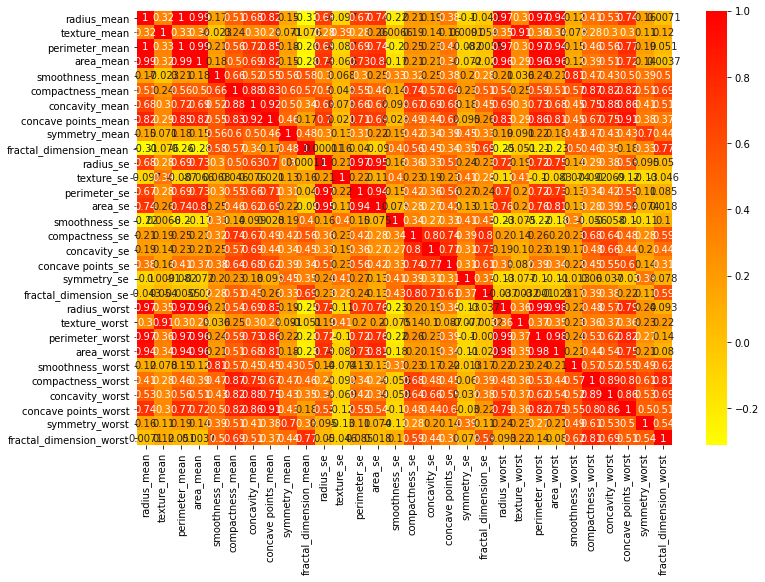

In [35]:
# correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.autumn_r)

In [60]:
def corr_features(data, threshold):
    corr_name = set()
    df_corr = data.corr()
    for i in range(len(df_corr.columns)):
        for j in range(i):
            if abs(df_corr.iloc[i,j])>=threshold:
                col_name = df_corr.columns[i]
                corr_name.add(col_name)
#     print('no. of features', len(corr_name))
#     print( corr_name)
    return corr_name

In [149]:
v= corr_features(df, 0.8)
print(len(v))
v= list(v)
# v.sort()
# print(v)

17


In [167]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest, SelectPercentile, VarianceThreshold

In [91]:
mutual_class = mutual_info_classif(X_train, y_train)
series = pd.Series(mutual_class)
series.index = X_train.columns
series.sort_values(ascending=False, inplace=True)
series.sort_index()

area_mean                  0.386490
area_se                    0.362137
area_worst                 0.480409
compactness_mean           0.230511
compactness_se             0.087547
compactness_worst          0.266602
concave points_mean        0.439657
concave points_se          0.118911
concave points_worst       0.466492
concavity_mean             0.401452
concavity_se               0.122739
concavity_worst            0.359738
fractal_dimension_mean     0.008504
fractal_dimension_se       0.057908
fractal_dimension_worst    0.056389
perimeter_mean             0.422396
perimeter_se               0.273921
perimeter_worst            0.490970
radius_mean                0.389990
radius_se                  0.248104
radius_worst               0.468315
smoothness_mean            0.078623
smoothness_se              0.004647
smoothness_worst           0.113865
symmetry_mean              0.055028
symmetry_se                0.005368
symmetry_worst             0.096978
texture_mean               0

<AxesSubplot:>

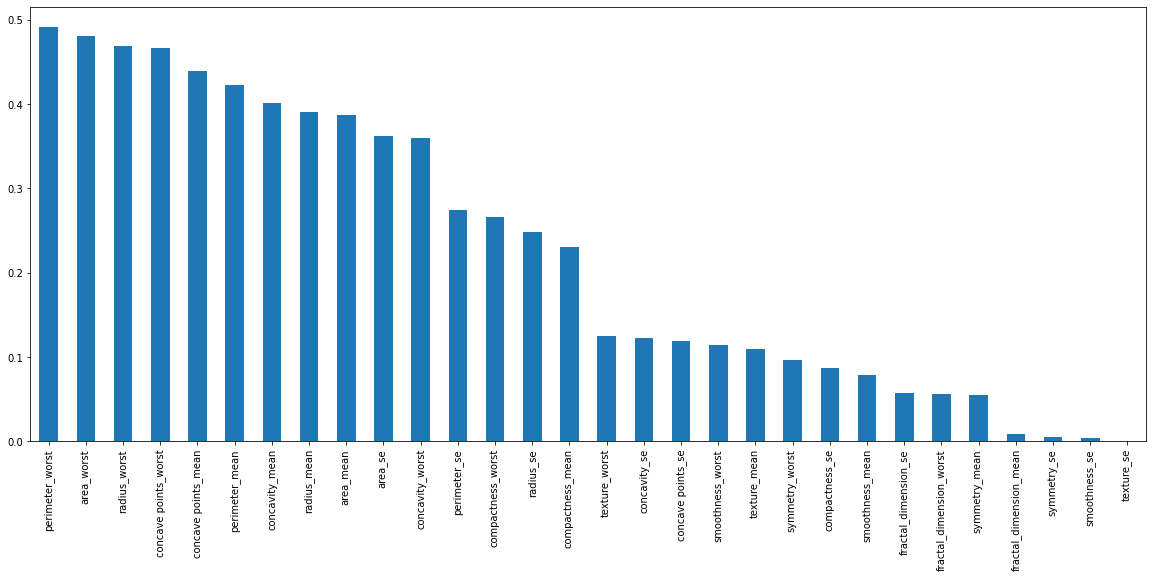

In [102]:
series.sort_values(ascending=False).plot.bar(figsize = (20,8))

In [112]:
k_best = SelectKBest(mutual_info_classif, k=15 ).fit(X_train, y_train)
X_train.columns[k_best.get_support()]

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')

In [166]:
k_percentile = SelectPercentile(mutual_info_classif, percentile=40 ).fit(X_train.drop(v,axis=1), y_train)
# X_train.columns[k_percentile.get_support()]
k_percentile.get_support()

array([ True,  True, False,  True, False, False,  True, False, False,
       False,  True, False, False])

In [165]:
X_train.drop(v, axis=1).columns[k_percentile.get_support()]

Index(['radius_mean', 'texture_mean', 'compactness_mean', 'radius_se',
       'concave points_se'],
      dtype='object')

In [145]:
df[X_train.columns[k_percentile.get_support()]]

radius_mean  perimeter_mean  area_mean  concavity_mean  \
0          17.99          122.80     1001.0         0.30010   
1          20.57          132.90     1326.0         0.08690   
2          19.69          130.00     1203.0         0.19740   
3          11.42           77.58      386.1         0.24140   
4          20.29          135.10     1297.0         0.19800   
..           ...             ...        ...             ...   
564        21.56          142.00     1479.0         0.24390   
565        20.13          131.20     1261.0         0.14400   
566        16.60          108.30      858.1         0.09251   
567        20.60          140.10     1265.0         0.35140   
568         7.76           47.92      181.0         0.00000   

     concave points_mean  perimeter_se  area_se  radius_worst  \
0                0.14710         8.589   153.40        25.380   
1                0.07017         3.398    74.08        24.990   
2                0.12790         4.585    94.03        23.570   
3                0.10520         3.445    27.23        14.910   
4                0.10430         5.438    94.44        22.540   
..                   ...           ...      ...           ...   
564              0.13890         7.673   158.70        25.450   
565              0.09791         5.203    99.04        23.690   
566              0.05302         3.425    48.55        18.980   
567              0.15200         5.772    86.22        25.740   
568              0.00000         2.548    19.15         9.456   

     perimeter_worst  area_worst  concavity_worst  concave points_worst  
0             184.60      2019.0           0.7119                0.2654  
1             158.80      1956.0           0.2416                0.1860  
2             152.50      1709.0           0.4504                0.2430  
3              98.87       567.7           0.6869                0.2575  
4             152.20      1575.0           0.4000                0.1625  
..               ...         ...              ...                   ...  
564           166.10      2027.0           0.4107                0.2216  
565           155.00      1731.0           0.3215                0.1628  
566           126.70      1124.0           0.3403                0.1418  
567           184.60      1821.0           0.9387                0.2650  
568            59.16       268.6           0.0000                0.0000  

[569 rows x 12 columns]

In [147]:
v

['area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'smoothness_worst',
 'texture_worst']

In [161]:
X_train.drop(v, axis=1).columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concave points_se', 'symmetry_se',
       'symmetry_worst'],
      dtype='object')

In [191]:
selector = VarianceThreshold(threshold=1)
selector.fit_transform(X_train)

array([[  17.99,   20.66,  117.8 , ...,   25.41,  138.1 , 1349.  ],
       [  20.29,   14.34,  135.1 , ...,   16.67,  152.2 , 1575.  ],
       [   9.  ,   14.4 ,   56.36, ...,   20.07,   60.9 ,  285.5 ],
       ...,
       [  17.2 ,   24.52,  114.2 , ...,   33.82,  151.6 , 1681.  ],
       [  14.03,   21.25,   89.79, ...,   30.28,   98.27,  715.5 ],
       [  13.03,   18.42,   82.61, ...,   22.81,   84.46,  545.9 ]])

In [192]:
selector.variances_

array([1.30605200e+01, 1.93141692e+01, 6.23318956e+02, 1.31192004e+05,
       1.88538540e-04, 2.69566035e-03, 6.42807755e-03, 1.54988858e-03,
       7.41316125e-04, 4.50288516e-05, 8.24085612e-02, 3.29818568e-01,
       4.39886211e+00, 2.35232477e+03, 9.34895804e-06, 3.27582368e-04,
       8.48758706e-04, 3.94635914e-05, 6.83684195e-05, 7.65171493e-06,
       2.50828395e+01, 3.94680346e+01, 1.21184018e+03, 3.53458383e+05,
       4.91307253e-04, 2.39168128e-02, 4.16360420e-02, 4.48317023e-03,
       3.45513129e-03, 2.76486181e-04])

In [193]:
selector.get_support()

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False])

In [194]:
X_train.columns[selector.get_support()]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'perimeter_se', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst'],
      dtype='object')

In [197]:
X_train.columns[~selector.get_support()]

Index(['smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')